# Phase 3 Notes

## OOP Object Oriented Programming

In [1]:
#to create a class
class ExampleClass:
    pass #at a minimum an empty class must contain pass

In [2]:
class Dog:
    
    def bark(self):
        return 'I am actually going to bark this time. bark!'
        
    def who_am_i(self):
        return self

In [3]:
#how to use a class and the defined instance methods
rex = Dog()
print(rex.bark())
print(rex.who_am_i())
rex == rex.who_am_i()

I am actually going to bark this time. bark!


True

Attributes = Fields, properties of object insatance

##### Example of super and subclasses

In [4]:
class Musician(object):
    
    def __init__(self, name): # We'll set name at instantiation time to demonstrate passing in arguments to super().__init__()
        self.name = name
        self.band = "The Beatles"
    
    def tune_instrument(self):
        print("Tuning Instrument!")
    
    def practice(self):
        print("Practicing!")
        
    def perform(self):
        print("Hello New York!")
        
class Singer(Musician):
    
    def __init__(self, name):
        super().__init__(name)  # Notice how we pass in name argument from init to the super().__init() method, because it expects it
        self.role = "Singer"
        
    def tune_instrument(self):
        print("No tuning needed -- I'm a singer!")
    
class Guitarist(Musician):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Guitarist"
        
    def practice(self):
        print("Strumming the old 6 string!")
        
class Bass_Guitarist(Guitarist):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Bass Guitarist"
        
    def practice(self):
        print("I play the Seinfeld Theme Song when I get bored")
        
    def perform(self):
        super().perform()
        print("Thanks for coming out!")
        
class Drummer(Musician):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Drummer"
        
    def tune_instrument(self):
        print('Where did I put those drum sticks?')
        
    def practice(self):
        print('Why does my chair still say "Pete Best"?')

## Calculus

Derivative: $$ \frac{df(x)}{dx} $$

The instaneous slope of $f(x)$ at $x = c$.

Define as limit of slope of chord between f(x + h) and f(x): $$\frac{\Delta y}{\Delta x} $$ 
- As $\Delta x \rightarrow 0$.

Finding $w_1$ minimizing cost function:

$$L = \sum_{i=1}^N (y_i - x_i w_1)^2 $$

#### Variables

w = weight

L = the parabola this function represents

delta r = displacment vector

inverted delta f = gradient

gradient is a slope, specifically the slope of the changing slope? aka acceleration? aka slope of non-linear functions?

gradient descent: find a random point. then check around it in steps to find the largest slope, aka gradient, and go in opposite direction to continuely find the slope "largest slope" smaller and smaller until it settles in the minimum point in the parabaloid/nth dimensional shape.

w0 is bias

w1 is a feature/ vector of slope of features?

beta0 is gradient?

RSS is residual sum of squares: level of variance in a regression model in units of residuals/error term. The sum of the squared value of x, y, m, and b. the sum of errors squared

RMSE is root mean squared error: the average error between a data point and the regression line

m = slope

b = y-int

b = bias

Residual is how far off a datapoint is from out regression line. in units of relavant variable (ex: $, lbs, mph, etc...)

$\hat{y}$ = predicted value of y

## Gradient Descent

In [ ]:
conda install -c anaconda sympy

In [ ]:
from sympy import *
from sympy.abc import x, y

x, y, i, N, w1 = symbols("x, y, i, N, w1")
L = summation((Indexed('y',i) - Indexed('x',i)*w1)**2 ,(i,1,N))
L

In [ ]:
grad = diff(L, w1) #derivative of L with respect to w1
grad

99 percent of problems will be solved with gradient descent

In [ ]:
def init_weight(X): #ask about this later. Does this create a normal distribution/weight for all features/values in said features?
    num_features = X.shape[1]
    w_0 = np.random.normal(loc =0 , 
                           scale = 4, 
                           size = (num_features,
                                   1))
    
    return w_0
    

## Logistic Regression

- Don't model the target labels $y$ vs features $X$ directly
- Model the probability $P(sex = 1| mass)$ 
- we only need to focus on one sex because it is binary, and the other probabilty is one minus this

#### Vanilla Logistic Regression

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df["target"]
X = df.drop(columns = ["target"], axis = 1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = .25)

NameError: name 'df' is not defined

In [16]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

NameError: name 'X_train' is not defined

#### Decision criterion of classifier based on probability

- When $P(sex = 1| mass) > 0.5 \rightarrow$ Class 1
- When $P(sex = 1| mass) \leq 0.5 \rightarrow$ Class 0

For a single feature $X$, the sigmoid function takes a form:

$$ \sigma(x | w_1, w_0) = \frac{1}{1 + exp\Big[-(w x + b)\Big]} $$

where $w$ is a weight parameter and $b$ is a bias parameter.

#### Logistic Regression in higher dimensions

w/weight is vector, and the perpindicular line is the descision boundry 

### Confusion Matrix

**_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

**_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

**_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

**_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

In [4]:
from sklearn.metrics import confusion_matrix
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

cf = confusion_matrix(example_labels, example_preds)
cf

array([[2, 3],
       [2, 4]], dtype=int64)

The predictions/labels are either 0 or 1. The confusion matrix shows:

- 2 values of 0 were correctly predicted as 0
- 3 values of 0 were falsely predicted as 1
- 2 values of 1 were falselt predicted as 0
- 4 values of 1 were correctly predicted as 1

In [6]:
# Visualize your confusion matrix
from sklearn.metrics import plot_confusion_matrix
pcf = plot_confusion_matrix(estimator= logreg, y_true = y_test, X = X_test)

NameError: name 'logreg' is not defined

#### Evaluation Metrics

- Precision measures how precise the predictions are
- Recall indicates what percentage of the classes we're interested in were actually captured by the model. 

$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $    

$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $

aka true positives / true positives plus false negatives
  
$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $

$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $
F1 score represents the Harmonic Mean of Precision and Recall
this means that the F1 score cannot be high without both precision and recall also being high

You can find the classification_report() function in the sklearn.metrics module, which takes labels and predictions and returns the precision, recall, F1 score and support (number of occurrences of each label in y_true) for the results of a model. 

In [9]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(precision_score(y_test,y_hat_test))
print(precision_score(y_train,y_hat_train))

print(recall_score(y_test,y_hat_test))
print(recall_score(y_train,y_hat_train))

print(accuracy_score(y_test,y_hat_test))
print(accuracy_score(y_train,y_hat_train))

print(f1_score(y_test,y_hat_test))
print(f1_score(y_train,y_hat_train))

In [11]:
from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)

NameError: name 'X' is not defined

### ROC Curve

ROC (reciever operator characteristic) is named for/was identified during world war 2 to identify japanease planes

#### Variables

- $\alpha$ is the false positive rate (reject null when null is true)
- $\beta$ is false negative rate (accept null when null is false)

$\alpha$ and $\beta$ depends on:
- significance level
- the structure of the hypothesis test (distribution, type of test, etc.)
- the data (sample size, etc.)

- True positive rate: $$ \frac{TP}{TP+FN}$$

Rate of correctly rejecting null (statistical power)

- False positive rate: $$ \frac{FP}{FP+TN}$$

Rate of falsely rejecting null (Type I error)

Choose optimal threshold that maximizes:
    
$$ J = TPR - FPR $$

Want as many true positive identifcations while minimizing false positives 

**Known as Youden's J-statistic**

It is recomennded to do a confusion matrix and classification report on the new y_pred_thresh against our initial y_test

#### Code

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [7]:
hd_data = pd.read_csv('Phase3_Topic26_Classification_Metrics/Data/heart.csv')
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Separate data into feature and target DataFrames
hd_X = hd_data.drop('target', axis=1)
hd_y = hd_data['target']

hd_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
hd_y.value_counts() # 1 = heart disease

1    165
0    138
Name: target, dtype: int64

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(hd_X, hd_y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
hd_scaler = StandardScaler()
hd_scaler.fit(X_train)
X_train_sc = hd_scaler.transform(X_train)
X_test_sc = hd_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
hd_model = LogisticRegression()
hd_model.fit(X_train_sc, y_train)

LogisticRegression()

In [14]:
y_pred = hd_model.predict(X_test_sc)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [15]:
y_prob = hd_model.predict_proba(X_test_sc)
y_prob[:5]

array([[0.99583439, 0.00416561],
       [0.2234686 , 0.7765314 ],
       [0.91939062, 0.08060938],
       [0.99402865, 0.00597135],
       [0.97047813, 0.02952187]])

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

In [17]:
thresholds[1::]

array([0.99463107, 0.96460629, 0.95334992, 0.91532844, 0.88556113,
       0.84869964, 0.81609939, 0.79704685, 0.77717419, 0.76653064,
       0.76485113, 0.76416585, 0.75528847, 0.73637076, 0.72140869,
       0.64710039, 0.5891358 , 0.45628628, 0.2934572 , 0.28590514,
       0.18286934, 0.0887099 , 0.06707534, 0.05818162, 0.00210274])

In [18]:
thresh_df = pd.DataFrame({'threshold': thresholds,
                          'tpr':  tpr, 'fpr': fpr}).iloc[1::, :]
thresh_df.head()

,threshold,tpr,fpr
1,0.994631,0.024390,0.000000
2,0.964606,0.390244,0.000000
3,0.953350,0.390244,0.028571
4,0.915328,0.463415,0.028571
5,0.885561,0.463415,0.085714


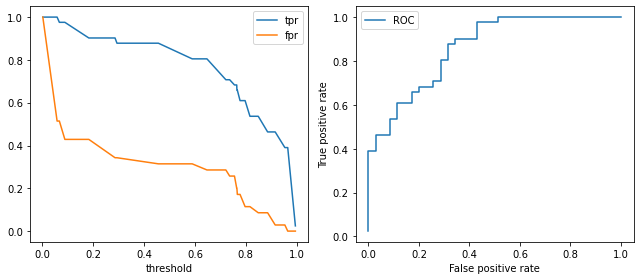

In [19]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')
plt.tight_layout()

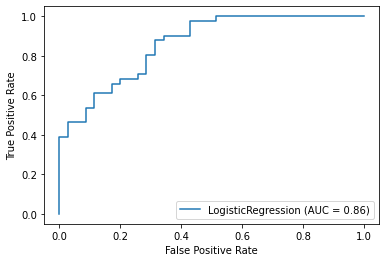

In [20]:
plot_roc_curve(hd_model, X_test_sc, y_test)

In [21]:
thresh_df['J_stat'] = \
thresh_df['tpr'] - thresh_df['fpr']
thresh_df.head()

,threshold,tpr,fpr,J_stat
1,0.994631,0.024390,0.000000,0.024390
2,0.964606,0.390244,0.000000,0.390244
3,0.953350,0.390244,0.028571,0.361672
4,0.915328,0.463415,0.028571,0.434843
5,0.885561,0.463415,0.085714,0.377700


<AxesSubplot:xlabel='threshold'>

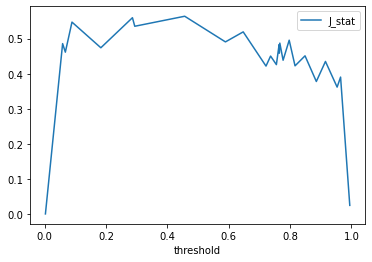

In [22]:
thresh_df.plot(x = 'threshold', y= 'J_stat')

In [24]:
max_selector = \
thresh_df.index == thresh_df['J_stat'].idxmax()

optimal_thresh = thresh_df[max_selector]
optimal_thresh

,threshold,tpr,fpr,J_stat
18,0.456286,0.878049,0.314286,0.563763


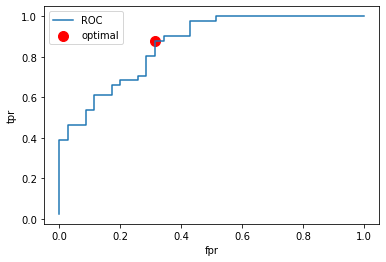

In [25]:
fig, ax = plt.subplots()
thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax, label = 'ROC')
optimal_thresh.plot.scatter(x = 'fpr', y = 'tpr', c ='r', s = 100, ax = ax, label = 'optimal' )
plt.show()

In [26]:
thresh = optimal_thresh['threshold'].values
# yes...this is the way to do it for binary class.
y_pred_with_threshold = (y_prob[:,1] >= thresh).astype(int)
y_pred_with_threshold

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
# Extract the probabilitiy predictions for the "1" class (heart disease)
y_hat_hd = y_prob[:, 1]

roc_auc_score(y_test, y_hat_hd)

0.8606271777003485

In [29]:
k = 10
C_list = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
k_list = np.arange(k)
cv_scores = []

for c in C_list :
    logreg = LogisticRegression(C = c)
    cv_loop_results = cross_validate(
                X=X_train_sc, 
                y=y_train,
                estimator=logreg, 
                cv=k,
                scoring=('roc_auc')) #the scoring is the roc auc
    cv_scores.append(dict(zip(k_list,cv_loop_results['test_score'])))
    
cv_score_df = pd.DataFrame(cv_scores) 
cv_score_df['C'] = C_list
cv_score_df.set_index('C', inplace = True)

In [30]:
# mean roc auc score
cv_score_df.mean(axis = 1)

C
0.001        0.903141
0.010        0.904580
0.100        0.909033
1.000        0.903415
10.000       0.901836
100.000      0.901836
1000.000     0.901836
10000.000    0.901836
dtype: float64

Select $C = 0.1$ as best regularization:
- based on ROC-AUC score

In [31]:
logreg_best = LogisticRegression(C = 0.1)
logreg_best.fit(X_train_sc, y_train)

LogisticRegression(C=0.1)

In [32]:
y_pred_probs = logreg_best.predict_proba(X_test_sc)

In [33]:
y_pred = logreg_best.predict(X_test_sc)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [34]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_probs[:,1])
bestmod_thresh_df = pd.DataFrame({'threshold': thresholds_best,
                          'tpr':  tpr_best, 'fpr': fpr_best, 'J_stat': tpr_best - fpr_best}).iloc[1::, :]
bestmod_thresh_df.head()

,threshold,tpr,fpr,J_stat
1,0.976302,0.024390,0.000000,0.024390
2,0.878354,0.414634,0.000000,0.414634
3,0.877252,0.414634,0.028571,0.386063
4,0.828446,0.512195,0.028571,0.483624
5,0.820708,0.512195,0.085714,0.426481


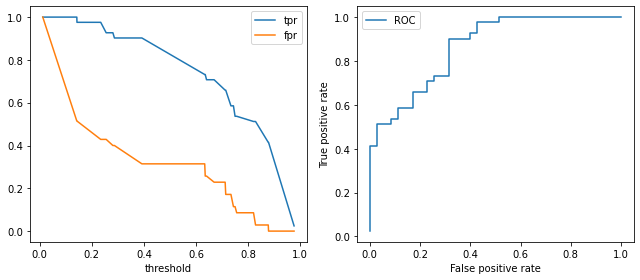

In [35]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
bestmod_thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')
plt.tight_layout()

In [36]:
best_idx = bestmod_thresh_df['J_stat'].idxmax()
best_point = pd.DataFrame(bestmod_thresh_df.iloc[best_idx]).T
best_point

,threshold,tpr,fpr,J_stat
17,0.286846,0.902439,0.4,0.502439


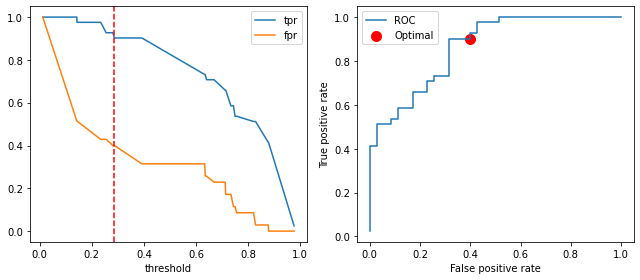

In [37]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
bestmod_thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
ax[0].axvline(best_point['threshold'].values, c = 'r', linestyle = '--')

bestmod_thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
best_point.plot.scatter(x = 'fpr', y = 'tpr', ax = ax[1], c ='r', s = 100, label = 'Optimal')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')

plt.tight_layout()

In [38]:
#filter on class 1 probabilities
y_pred_best_with_threshold = (y_pred_probs[:,1] >= 0.4).astype(int)
y_pred_best_with_threshold

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [39]:
print(classification_report(y_test, y_pred_best_with_threshold))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



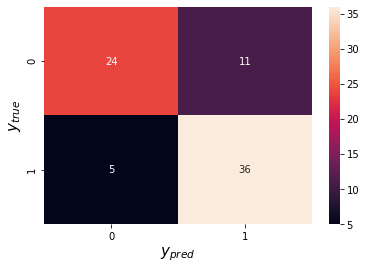

In [40]:
conf_mat_best = confusion_matrix(y_test, y_pred_best_with_threshold)
fig, ax = plt.subplots()
sns.heatmap(conf_mat_best, annot = True, ax = ax)
ax.set_ylabel(r'$y_{true}$', size = 15)
ax.set_xlabel(r'$y_{pred}$', size = 15)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_best_with_threshold))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



### K Nearest neighbors and dimentionality

 $k$: number of neighbors
 
 low $k$ = low bias, high varience model
 
 high $k$ = high bias, low varience : too rigid/not sensative enough

#### Code

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
iris_df = pd.read_csv('Phase3_Topic28_KNearest_Neighbors_Curse_of_Dimensionality//Data/Iris.csv').drop(columns = ['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
target_transform = LabelEncoder()
iris_df['Species'] = target_transform.fit_transform(iris_df['Species'])

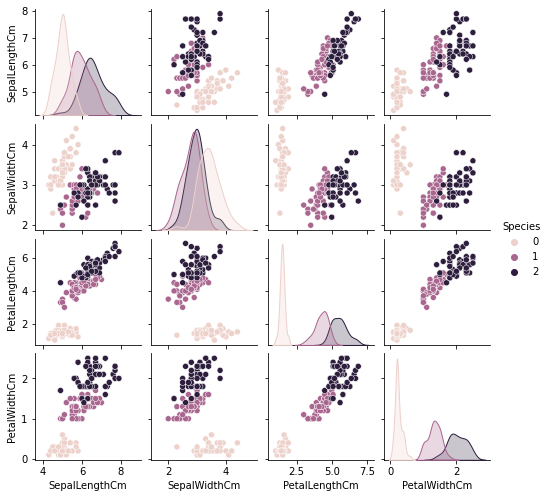

In [4]:
sns.pairplot(hue = 'Species', data = iris_df, height = 1.75)
plt.show()

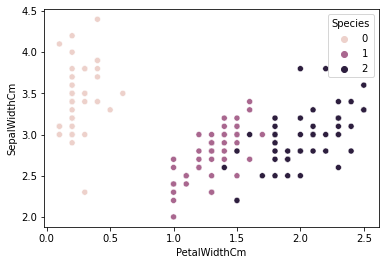

In [5]:
sns.scatterplot(y = 'SepalWidthCm', x = 'PetalWidthCm', hue = 'Species', data = iris_df)
plt.show()

In [6]:
# so whats next?
X = iris_df[['SepalWidthCm', 'PetalWidthCm']]
y = iris_df['Species']

In [7]:
# shuffle and split, stratify keeps target distribution same in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42)

In [49]:
#train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42) stratify keeps the percentages the same in both the test and train dataset

### Descision Tree

- X / features do not need to be scaled in descision trees
- Can improve with more features
- Entropy is a measure of how evenly mixed a class is. 0 is the lowest, 1 is the highest
- Where probability of all classes is equal, entropy is 1.
- Where entropy is .5 of two items in a class, entropy is 1.
